In [3]:
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np

import matplotlib
import sys
import pickle
import itertools

sys.path.append('/home/usc/ie/dcr/hk/ambe_analysis')

# Import Diego's tools
from paquetes.npz_to_df import truehits_info_to_df
from paquetes.npz_to_df import track_info_to_df
from paquetes.npz_to_df import simple_track_info_to_df
from paquetes.npz_to_df import digihits_info_to_df

from tqdm.notebook import tqdm

pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100000)

%load_ext autoreload
%autoreload 2

In [4]:
npz     = '/mnt/netapp2/Store_uni/home/usc/ie/dcr/software/hk/WCSim/install/nicfVec_0kHzDR_NOTRIGGER.npz'
nevents = 30000

# Creación del DataFrame de DigiHits usando la función digihits_info_to_df
df_trueHits = truehits_info_to_df(npz)
df_digiHits = digihits_info_to_df(npz, nevents)

In [5]:
df_digiHits[df_digiHits['event_id'].values == 9].sort_values('digi_hit_time')

,event_id,digi_hit_pmt,digi_hit_charge,digi_hit_time,digi_hit_trigger,digi_hit_x,digi_hit_y,digi_hit_z,digi_hit_truehit_parent_trackID,digi_hit_truehit_creator,digi_hit_truehit_times,digi_hit_r
13,9,432,1.311751,10618.799805,0,101.375114,7.690817,-120.561806,[158],[Cerenkov],[10619.451796136758],157.706092
15,9,134,1.097356,10619.5,0,66.345055,-42.47625,-138.42215,[158],[Cerenkov],[10619.68070703498],159.268922
16,9,413,0.619028,10619.700195,0,139.795395,7.690817,-72.590004,[158],[Cerenkov],[10619.393913568198],157.706087
14,9,1424,0.7322,10620.0,0,150.049103,65.794785,-47.662426,[158],[Cerenkov],[10620.271845969324],170.632335
12,9,1502,0.244811,45572.800781,0,-102.429703,73.52375,-114.358505,[173],[Cerenkov],[45573.377829874975],170.221778
11,9,1951,1.277559,45573.0,0,-100.542068,138.782364,-58.0,[173],[Cerenkov],[45573.649240631414],180.923332
17,9,1708,1.125299,45573.101562,0,50.167068,138.848557,-44.432961,[173],[Cerenkov],[45572.50386342291],154.175045
10,9,1973,0.940955,45573.398438,0,-116.0,138.848557,15.665866,[173],[Cerenkov],[45573.94114335103],181.604904
9,9,1725,0.977197,45574.101562,0,7.728967,138.782364,-44.613037,[173],[Cerenkov],[45574.60738278248],145.981521


In [6]:
df_trueHits[df_trueHits['event_id'].values == 4]

,event_id,true_hit_parent,true_hit_pmt,true_hit_time,true_hit_start_time,hit_x,hit_y,hit_z,hit_start_x,hit_start_y,hit_start_z,true_hit_creatorProcess,hit_r,hit_start_r
4,4,53,1182,397167401918074616553668608.0,397167401918074616553668608.0,51.332935,-130.226654,-116.844521,1.754047,-14.94293,-11.887195,Cerenkov,182.336759,19.174807
4,4,53,754,397167401918074616553668608.0,397167401918074616553668608.0,40.969433,-99.125443,-148.749283,1.751387,-14.952692,-11.894196,Cerenkov,183.386741,19.186512
4,4,85,1364,397167401918074616553668608.0,397167401918074616553668608.0,112.348,59.469414,102.181076,20.897232,-4.290061,21.955746,Cerenkov,163.094011,30.612966
4,4,85,374,397167401918074616553668608.0,397167401918074616553668608.0,152.012222,15.669479,40.589516,20.921612,-4.296725,21.978575,Cerenkov,158.116277,30.646916
4,4,85,330,397167401918074616553668608.0,397167401918074616553668608.0,43.884354,15.127871,145.896332,21.010487,-4.302228,22.058741,Cerenkov,153.102673,30.765854
4,4,85,285,397167401918074616553668608.0,397167401918074616553668608.0,-56.715446,-39.487511,136.243988,21.072784,-4.312457,22.209473,Cerenkov,152.768877,30.917959
4,4,85,285,397167401918074616553668608.0,397167401918074616553668608.0,-56.581177,-43.505547,135.422485,21.069592,-4.316496,22.309155,Cerenkov,153.079756,30.988033
4,4,85,287,397167401918074616553668608.0,397167401918074616553668608.0,-58.659966,-32.363281,137.773041,21.069302,-4.30241,22.157272,Cerenkov,153.198513,30.876705
4,4,85,1326,397167401918074616553668608.0,397167401918074616553668608.0,7.420253,57.306923,152.361633,21.068058,-4.298815,22.138592,Cerenkov,162.951560,30.861953
4,4,85,1346,397167401918074616553668608.0,397167401918074616553668608.0,59.367149,52.865471,143.346619,21.068047,-4.298787,22.138447,Cerenkov,163.912994,30.861837


In [7]:
delta_time = []
length     = []
for i in tqdm(range(nevents), total=nevents):
    temp_df = df_trueHits[df_trueHits['event_id'].values == i]
    # print(f"event {i}")
    
    if len(temp_df) > 1:
        true_hit_parents = np.unique(temp_df['true_hit_parent'])
        # print("true_hit_parents")
        # print(true_hit_parents)

        # print("times")
        for j in true_hit_parents:    
            times = temp_df[temp_df['true_hit_parent'].values == j]['true_hit_time'].to_numpy()
            # print(times)
            delta_time.append(np.max(times) - np.min(times))
            length.append(len(temp_df[temp_df['true_hit_parent'].values == j]))

  0%|          | 0/30000 [00:00<?, ?it/s]

In [8]:
nonZeroDelta  = [i for (i, j) in zip(delta_time, length) if i != 0]
nonZeroLenght = [j for (i, j) in zip(delta_time, length) if i != 0]

nonBigDelta   = [i for (i, j) in zip(nonZeroDelta, nonZeroLenght) if i < 10000]
nonBigLength  = [j for (i, j) in zip(nonZeroDelta, nonZeroLenght) if i < 10000]

In [9]:
def mean_uncertainty(incertidumbres):
    return np.sqrt(np.sum(np.array(incertidumbres)**2)) / len(incertidumbres)

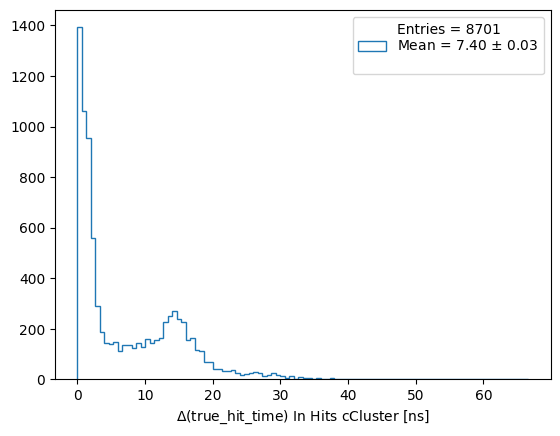

In [13]:
plt.hist(nonBigDelta, bins=100, histtype="step");
plt.xlabel(rf"$\Delta$(true_hit_time) In Hits cCluster [ns]");

nonBigDelta_stat_unc = [np.sqrt(i) for i in nonBigDelta]

mean_sigma = mean_uncertainty(nonBigDelta_stat_unc)

entries = len(nonBigDelta)
mean    = np.mean(nonBigDelta)
std_dev = np.std(nonBigDelta)

# Crear la leyenda con las estadísticas
legend_text = (f'Entries = {entries}\n'
              f'Mean = {mean:.2f} $\pm$ {mean_sigma:.2f}\n')

# Añadir la leyenda al gráfico
plt.legend([legend_text], loc='upper right');

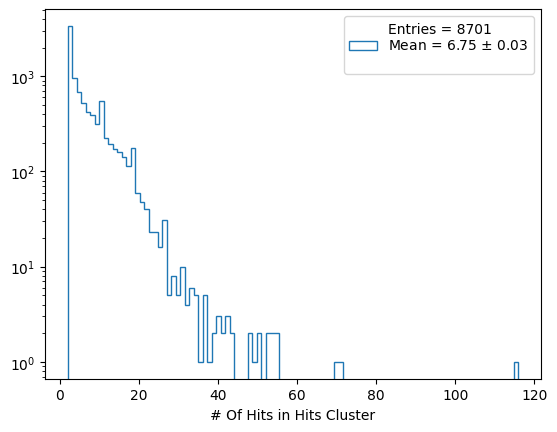

In [12]:
plt.hist(nonBigLength, bins=100, histtype="step");
plt.yscale("log");
plt.xlabel("# Of Hits in Hits Cluster");

nonBigLength_stat_unc = [np.sqrt(i) for i in nonBigLength]

mean_sigma = mean_uncertainty(nonBigLength_stat_unc)

entries = len(nonBigLength)
mean    = np.mean(nonBigLength)
std_dev = np.std(nonBigLength)

# Crear la leyenda con las estadísticas
legend_text = (f'Entries = {entries}\n'
              f'Mean = {mean:.2f} $\pm$ {mean_sigma:.2f}\n')

# Añadir la leyenda al gráfico
plt.legend([legend_text], loc='upper right');